In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


In [2]:
train_images = train_images.reshape((60000, 28, 28, 1))

train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))

test_images = test_images.astype('float32') / 255


In [3]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [5]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=5, batch_size=64)
history_d = history.history
history_d.keys()

Epoch 1/5
60000/60000 [==============================] - 52s 865us/step - loss: 0.1756 - acc: 0.9442
Epoch 2/5
60000/60000 [==============================] - 46s 761us/step - loss: 0.0465 - acc: 0.9860
Epoch 3/5
60000/60000 [==============================] - 47s 780us/step - loss: 0.0329 - acc: 0.9897
Epoch 4/5
60000/60000 [==============================] - 51s 849us/step - loss: 0.0245 - acc: 0.9927
Epoch 5/5
60000/60000 [==============================] - 47s 791us/step - loss: 0.0198 - acc: 0.9940


dict_keys(['loss', 'acc'])

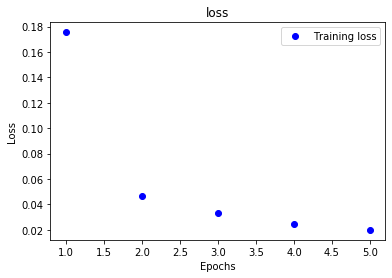

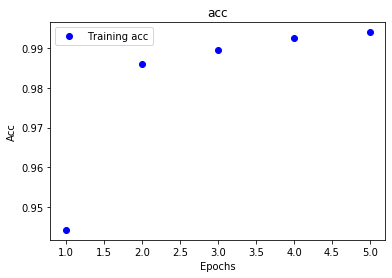

In [8]:
import matplotlib.pyplot as plt

epochs = range(1, len(history_d["loss"]) + 1)
plt.plot(epochs, history_d["loss"], "bo", label="Training loss")
plt.title("loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, history_d["acc"], "bo", label="Training acc")
plt.title("acc")
plt.xlabel("Epochs")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [9]:
loss, acc = model.evaluate(test_images, test_labels)
print("loss -> %.5f; acc -> %.5f" %(loss, acc))

10000/10000 [==============================] - 3s 278us/step
loss -> 0.02862; acc -> 0.99110
